In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import statsmodels as sm
import statsmodels.api as smapi
import statsmodels.regression.linear_model as lm
%matplotlib inline

In [3]:
df = pd.read_csv("../../output/data_analysis.csv")
# This has the releases with zero NC/NO removed
# Need to investigate to see why this happens in all -rc1 releases
#df = pd.read_csv("../../output/data_analysis_cleaned.csv")
df[" E_Line"] = df[" E_Line"].astype(str).astype(int).div(1000)
df[" E_Module"] = df[" E_Module"].astype(str).astype(int).div(1000)
df[" NC"] = df[" NC"].div(1000)
df[" NO"] = df[" NO"].div(1000)

In [4]:
df.describe()

NC          NO    E_Module        E_Line
count  638.000000  638.000000  638.000000    638.000000
mean     0.351774    2.436019    2.329577    236.271072
std      1.698166   13.994155    6.355299   1175.349986
min      0.000000    0.000000    0.000000      0.000000
25%      0.043250    0.133000    0.222250      3.641500
50%      0.070000    0.218000    0.342500      6.751500
75%      0.102000    0.319750    1.381250     32.213000
max     27.695000  236.064000   59.786000  13296.464000

In [5]:
# print out a correlation matrix of our data frame
corr = df.corr()

# display it
display(corr)

NC        NO   E_Module    E_Line
 NC        1.000000  0.997152   0.702754  0.706966
 NO        0.997152  1.000000   0.698210  0.706177
 E_Module  0.702754  0.698210   1.000000  0.923956
 E_Line    0.706966  0.706177   0.923956  1.000000

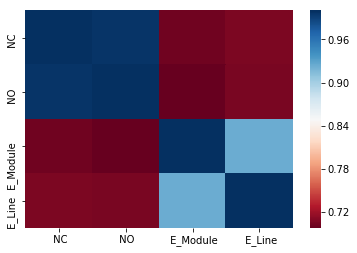

In [6]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

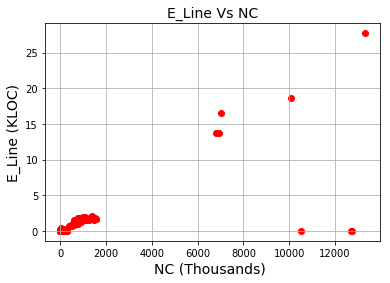

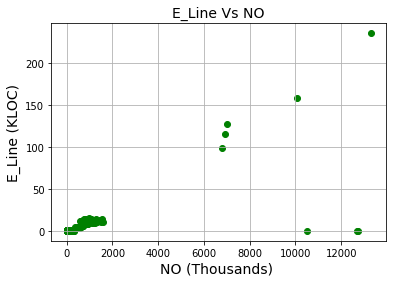

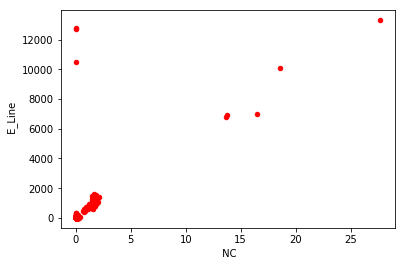

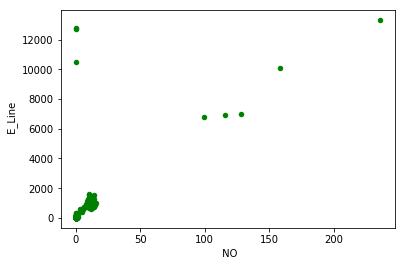

In [18]:
df.plot.scatter(x=' NC', y=' E_Line', c='red')
df.plot.scatter(x=' NO', y=' E_Line', c='green')

In [8]:
# Let's create multiple regression
X = df[[' NC',' NO']]
Y = df[' E_Line']
X = smapi.add_constant(X)
model = lm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

OLS Regression Results                            
Dep. Variable:                 E_Line   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     317.6
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           2.54e-96
Time:                        20:19:17   Log-Likelihood:                -5193.9
No. Observations:                 638   AIC:                         1.039e+04
Df Residuals:                     635   BIC:                         1.041e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3675     36.529      1.981      0.048       0.636     144.099
 

In [31]:
data = {'Observed':Y, 'Predicted':predictions}
results = pd.DataFrame(data) 
results['Version'] = np.arange(results.__len__())
results

Observed  Predicted  Version
0       2.255   1.312107        0
1       0.588   1.562877        1
2       1.296   1.781837        2
3       0.330   1.545342        3
4       0.344   1.530150        4
5       5.215   3.812948        5
6       2.976   1.312107        6
7       0.359   1.351750        7
8       1.254   1.734955        8
9       1.123   1.597479        9
10      0.272   1.483506       10
11      0.158   1.449793       11
12      0.330   1.682279       12
13      5.233   3.493979       13
14      1.659   1.312107       14
15      0.629   1.461818       15
16      0.657   1.677412       16
17      0.399   1.499650       17
18      0.180   1.444108       18
19      6.036   3.928917       19
20      1.595   1.312107       20
21      0.860   1.708046       21
22      0.280   1.459782       22
23      0.112   1.381188       23
24      0.183   1.432431       24
25      0.345   1.522226       25
26      0.118   1.383897       26
27      6.653   4.303184       27
28      2.578   1.312107       28
29      1.227   1.861005       29
..        ...        ...      ...
608    13.254   6.099880      608
609     2.025   1.312107      609
610     0.584   1.554994      610
611     0.306   1.537291      611
612     0.517   1.780914      612
613     0.173   1.559994      613
614     0.304   1.607247      614
615     0.321   1.583998      615
616     0.049   1.376484      616
617    12.481   5.391715      617
618     1.899   1.312107      618
619     0.293   1.494238      619
620     0.396   1.617404      620
621     0.358   1.738296      621
622     0.246   1.667794      622
623     0.429   1.643565      623
624     0.294   1.684413      624
625     0.195   1.495183      625
626    11.662   5.444500      626
627     1.764   1.312107      627
628     0.423   1.546461      628
629     0.571   1.905635      629
630     0.062   1.360508      630
631     0.197   1.492439      631
632     0.244   1.520840      632
633     0.291   1.630432      633
634    10.668   3.015125      634
635     0.381   1.585286      635
636     0.412   1.622346      636
637     0.218   1.509940      637

[638 rows x 3 columns]

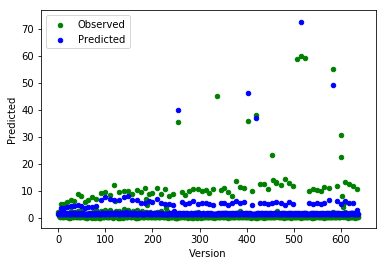

In [35]:
ax = results.plot(kind='scatter', x='Version', y='Observed', c='green', label='Observed')
results.plot(kind='scatter', x='Version', y='Predicted', c='blue', label='Predicted', ax=ax)

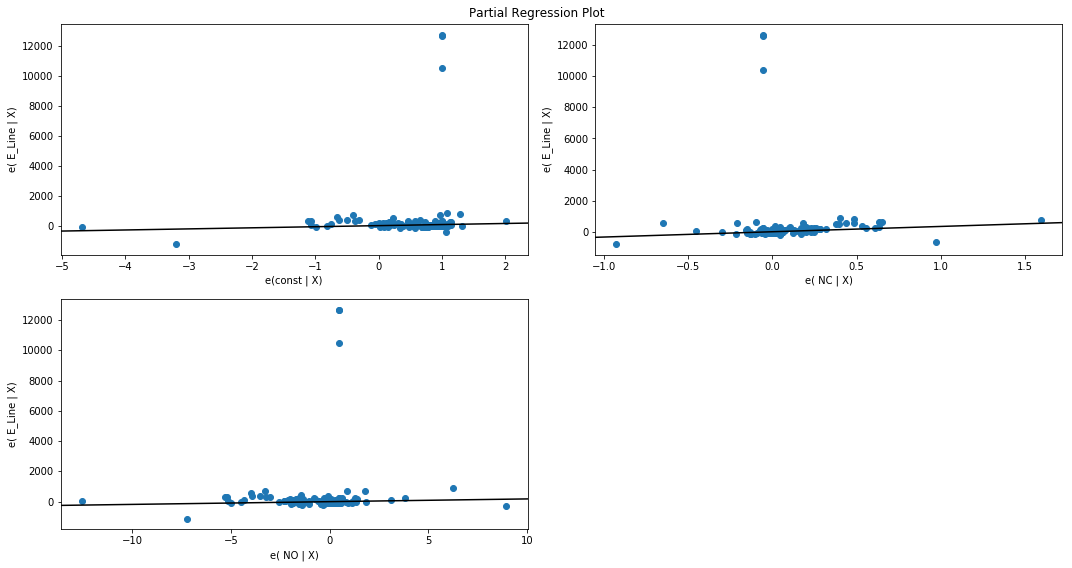

In [10]:
partialRegPlot = plt.figure(figsize=(15,8))
partialRegPlot = sm.graphics.regressionplots.plot_partregress_grid(model, fig=partialRegPlot)

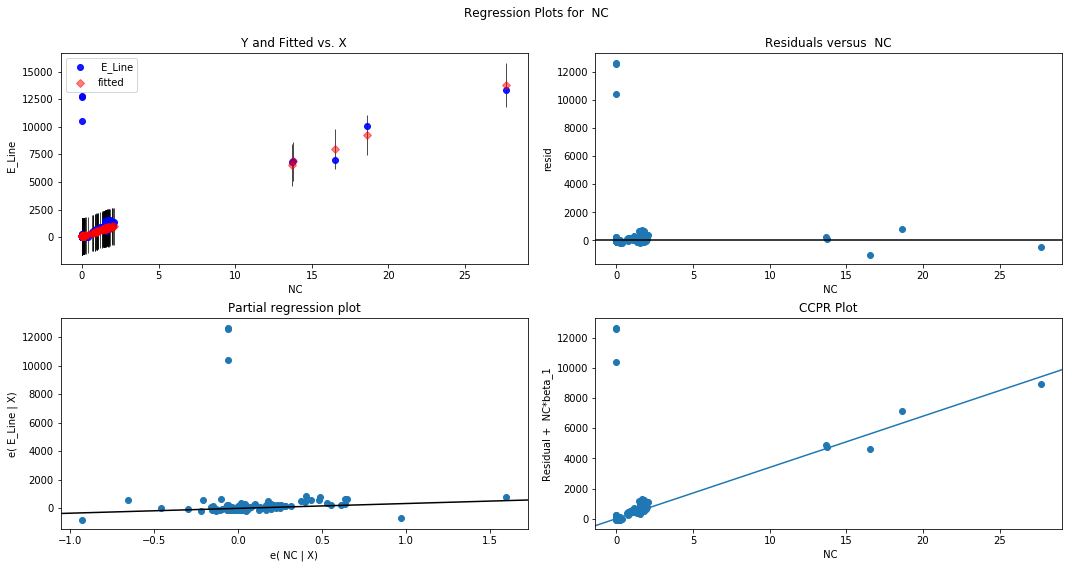

In [11]:
regPlotNC = plt.figure(figsize=(15,8))
regPlotNC = sm.graphics.regressionplots.plot_regress_exog(model, " NC", fig=regPlotNC)

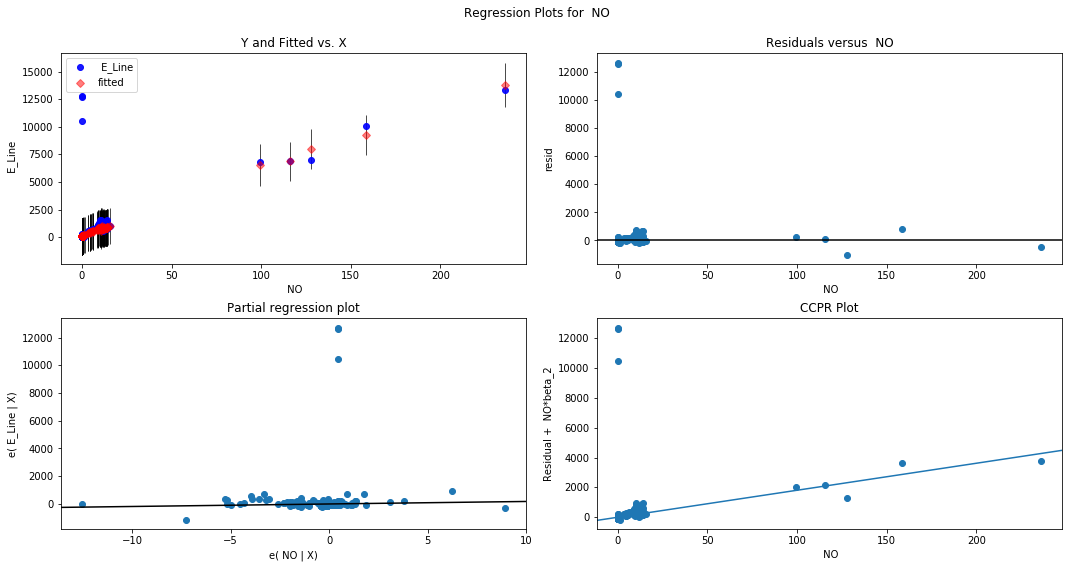

In [12]:
regPlotNO = plt.figure(figsize=(15,8))
regPlotNO = sm.graphics.regressionplots.plot_regress_exog(model, " NO", fig=regPlotNO)

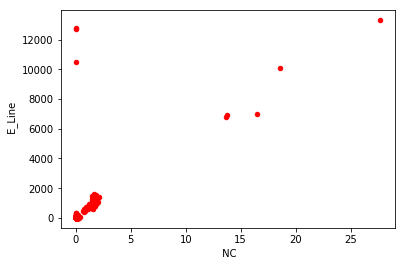

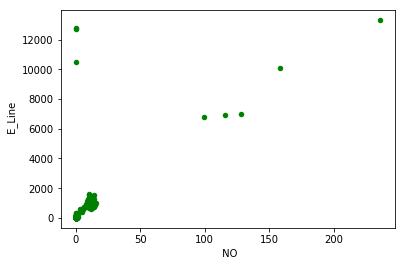

In [19]:
df.plot.scatter(x=' NC', y=' E_Line', c='red')
df.plot.scatter(x=' NO', y=' E_Line', c='green')

In [14]:
# Let's create multiple regression
X = df[[' NC',' NO']]
Y = df[' E_Module']
X = smapi.add_constant(X)
model = lm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

OLS Regression Results                            
Dep. Variable:               E_Module   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     311.2
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           6.24e-95
Time:                        20:19:27   Log-Likelihood:                -1866.7
No. Observations:                 638   AIC:                             3739.
Df Residuals:                     635   BIC:                             3753.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3121      0.199      6.610      0.000       0.922       1.702
 

In [36]:
data = {'Observed':Y, 'Predicted':predictions}
results = pd.DataFrame(data) 
results['Version'] = np.arange(results.__len__())
results

Observed  Predicted  Version
0       2.255   1.312107        0
1       0.588   1.562877        1
2       1.296   1.781837        2
3       0.330   1.545342        3
4       0.344   1.530150        4
5       5.215   3.812948        5
6       2.976   1.312107        6
7       0.359   1.351750        7
8       1.254   1.734955        8
9       1.123   1.597479        9
10      0.272   1.483506       10
11      0.158   1.449793       11
12      0.330   1.682279       12
13      5.233   3.493979       13
14      1.659   1.312107       14
15      0.629   1.461818       15
16      0.657   1.677412       16
17      0.399   1.499650       17
18      0.180   1.444108       18
19      6.036   3.928917       19
20      1.595   1.312107       20
21      0.860   1.708046       21
22      0.280   1.459782       22
23      0.112   1.381188       23
24      0.183   1.432431       24
25      0.345   1.522226       25
26      0.118   1.383897       26
27      6.653   4.303184       27
28      2.578   1.312107       28
29      1.227   1.861005       29
..        ...        ...      ...
608    13.254   6.099880      608
609     2.025   1.312107      609
610     0.584   1.554994      610
611     0.306   1.537291      611
612     0.517   1.780914      612
613     0.173   1.559994      613
614     0.304   1.607247      614
615     0.321   1.583998      615
616     0.049   1.376484      616
617    12.481   5.391715      617
618     1.899   1.312107      618
619     0.293   1.494238      619
620     0.396   1.617404      620
621     0.358   1.738296      621
622     0.246   1.667794      622
623     0.429   1.643565      623
624     0.294   1.684413      624
625     0.195   1.495183      625
626    11.662   5.444500      626
627     1.764   1.312107      627
628     0.423   1.546461      628
629     0.571   1.905635      629
630     0.062   1.360508      630
631     0.197   1.492439      631
632     0.244   1.520840      632
633     0.291   1.630432      633
634    10.668   3.015125      634
635     0.381   1.585286      635
636     0.412   1.622346      636
637     0.218   1.509940      637

[638 rows x 3 columns]

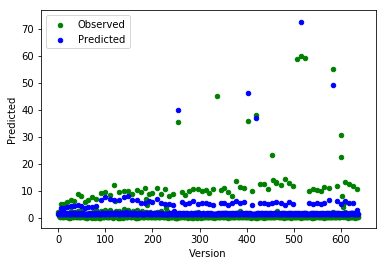

In [37]:
ax = results.plot(kind='scatter', x='Version', y='Observed', c='green', label='Observed')
results.plot(kind='scatter', x='Version', y='Predicted', c='blue', label='Predicted', ax=ax)

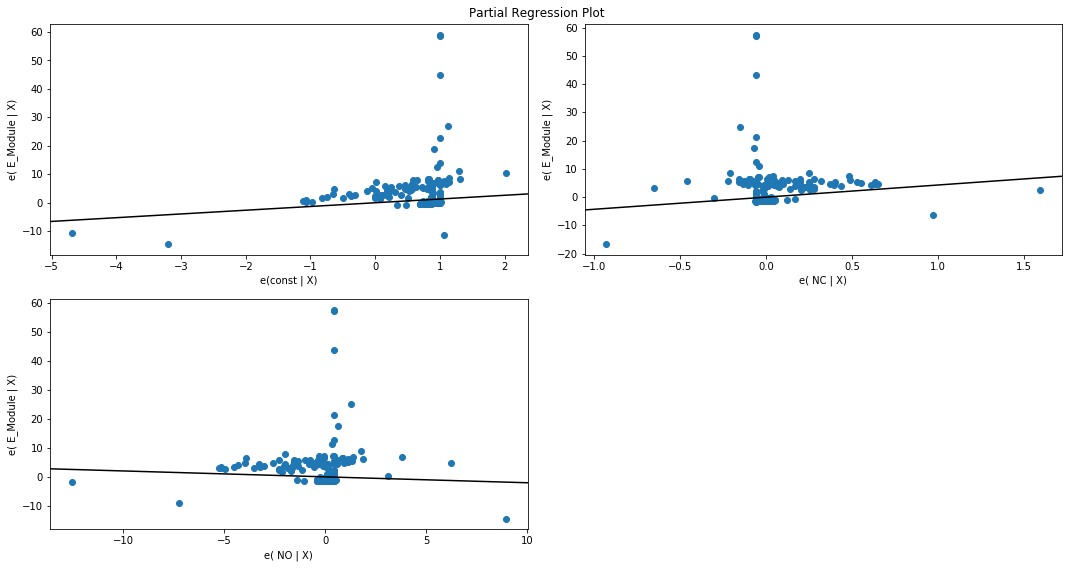

In [15]:
partialRegPlot = plt.figure(figsize=(15,8))
partialRegPlot = sm.graphics.regressionplots.plot_partregress_grid(model, fig=partialRegPlot)

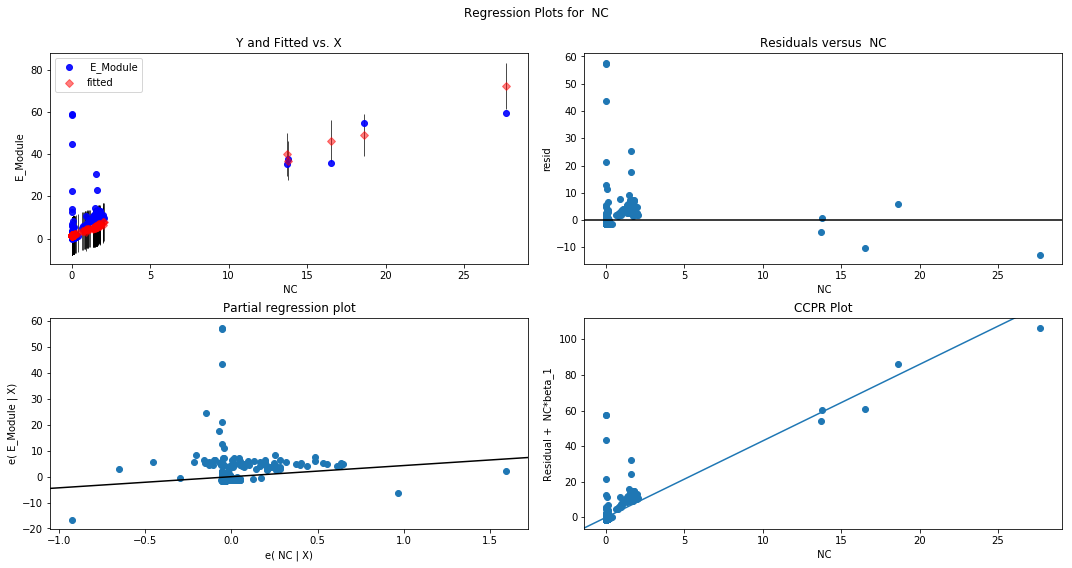

In [16]:
regPlotNC = plt.figure(figsize=(15,8))
regPlotNC = sm.graphics.regressionplots.plot_regress_exog(model, " NC", fig=regPlotNC)

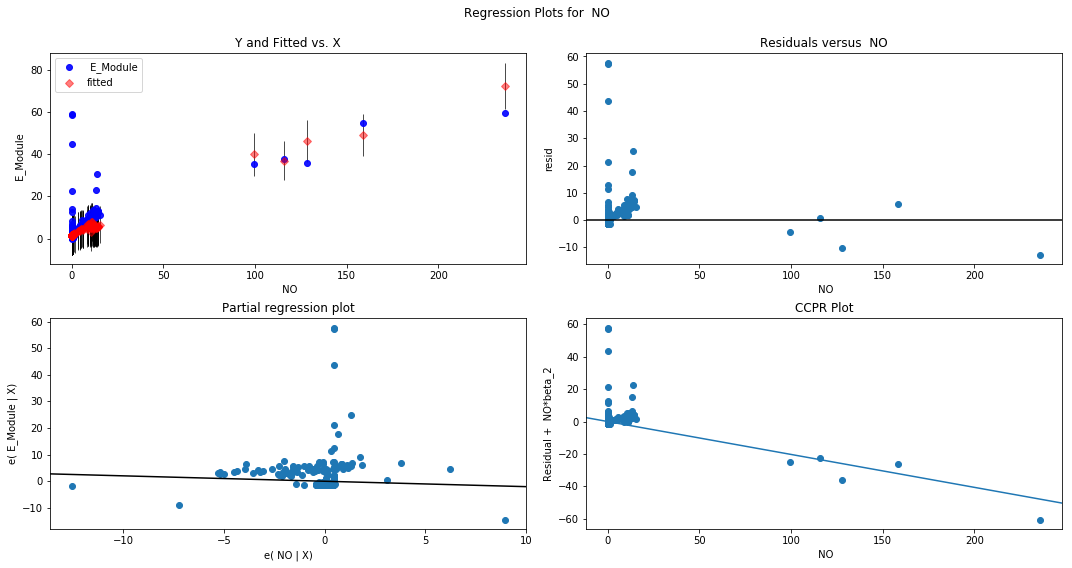

In [17]:
regPlotNO = plt.figure(figsize=(15,8))
regPlotNO = sm.graphics.regressionplots.plot_regress_exog(model, " NO", fig=regPlotNO)